6420422017 Witsarut Wongsim

https://www.analyticsvidhya.com/blog/2020/07/transfer-learning-for-nlp-fine-tuning-bert-for-text-classification/ <br>
https://pytorch.org/hub/huggingface_pytorch-transformers/<br>
https://huggingface.co/transformers/quicktour.html

Summary fine tune model



```


Here is a summary of the fine-tuning process for the final model:

1.Balanced the dataset using RandomOverSampler:
Class distribution before RandomOverSampler:

0    0.653226
1    0.346774
Name: label, dtype: float64

Class distribution after RandomOverSampler:
0    0.5
1    0.5

Split train dataset into train, validation and test sets + 

Train 70% (Class 0:50% , Class 1:50%) 
 Val 15%   Test 15%


2.max_seq_len = 25

3. Chose the pre-trained WangchanBERTa model and froze its weights
bert = AutoModel.from_pretrained('poom-sci/WangchanBERTa-finetuned-sentiment')

4.batch_size = 32

5. Add more layer
# dropout layer
      self.dropout = nn.Dropout(0.1)

      # dense layer 1
      self.fc1 = nn.Linear(768,512)    
      # dense layer 2

      self.fc2 = nn.Linear(512,256)
      # dense layer 3 (Output layer)
      self.fc3 = nn.Linear(256,2)
 
6. define the optimizer and tuning learing rate
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)

7.epochs = 100

8. Saved the best model with the lowest validation loss
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
Please find the following attachments for your review:

Google Colab notebook file with the final implemented Transformer model, training, and evaluation code
Screenshots of the captured results for both training and testing, including the F1 score
I would like to thank you for your guidance and support throughout the course of this assignment. Kindly let me know if you need any further information or clarification regarding my submission.

Looking forward to your feedback.

Best regards

```



Upload csv file spam data v2

# Install Transformers Library

In [1]:
!pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


transformers in /usr/local/lib/python3.9/dist-packages (4.27.3)

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#!pip install transformers==3

In [4]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")

# Load Dataset

In [5]:
df = pd.read_csv("tcas61-2.csv")#("spamdata_v2.csv")
df.head()

,label,text
0,0,มึงกล้าพูดรึป่าวว่าระบบการศึกษามันดีอ่ะ ถุ้ยเฟ...
1,0,เบื่อเวลามาโพสตไรแบบนี้ชอบเป็นพวกที่ใช่โปรไฟล์...
2,0,พ่อมึงเป็นติ่งรัฐบาลหรอสัส ที่เรียกเก็บตังแพงม...
3,0,ใครก็ช่วยลบไอ้นี้ออกจากกลุ่มหน่อยครับ มันมาโพส...
4,0,เครียดมากอะตอนนี้


In [6]:
df.shape

(124, 2)

In [7]:
# check class distribution
df['label'].value_counts(normalize = True)

0    0.653226
1    0.346774
Name: label, dtype: float64

In [8]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




```
# This is formatted as code
```

# Split train dataset into train, validation and test sets +RandomOverSampler Train 70  Val 15 Test 15 

In [14]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']
print(y.value_counts(normalize=True))

# Split the dataset into train, validation, and test sets
train_text, temp_text, train_labels, temp_labels = train_test_split(X, y, random_state=2018, test_size=0.3, stratify=y)

# Apply RandomOverSampler to balance the training dataset
ros = RandomOverSampler(random_state=2018)
train_text_resampled, train_labels_resampled = ros.fit_resample(pd.DataFrame(train_text), train_labels)

# Assign the resampled data back to the original variable names
train_text = train_text_resampled.squeeze()
train_labels = train_labels_resampled


# Display the class distribution after applying RandomOverSampler
print("\nClass distribution after RandomOverSampler:")
print(train_labels.value_counts(normalize=True))


print('train_text shape =', train_text.shape)
print('temp_text shape =', temp_text.shape)

# We will use temp_text and temp_labels to create validation and test set
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

print('val_text shape =', val_text.shape)
print('test_text shape =', test_text.shape)


0    0.653226
1    0.346774
Name: label, dtype: float64

Class distribution after RandomOverSampler:
0    0.5
1    0.5
Name: label, dtype: float64
train_text shape = (112,)
temp_text shape = (38,)
val_text shape = (19,)
test_text shape = (19,)




```
# This is formatted as code
```

Train 70  Val 15 Test 15 

In [40]:
"""
train_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['label'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=df['label'])

print('train_text shape =',train_text.shape)
print('temp_text shape =',temp_text.shape)

# we will use temp_text and temp_labels to create validation and test set
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

print('val_text shape =',val_text.shape)
print('test_text shape =',test_text.shape)
"""

"\ntrain_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['label'], \n                                                                    random_state=2018, \n                                                                    test_size=0.3, \n                                                                    stratify=df['label'])\n\nprint('train_text shape =',train_text.shape)\nprint('temp_text shape =',temp_text.shape)\n\n# we will use temp_text and temp_labels to create validation and test set\nval_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, \n                                                                random_state=2018, \n                                                                test_size=0.5, \n                                                                stratify=temp_labels)\n\nprint('val_text shape =',val_text.shape)\nprint('test_text shape =',test_text.shape)\n"

# Import BERT Model and BERT Tokenizer
https://huggingface.co/bert-base-uncased?text=Paris+is+the+%5BMASK%5D+of+France.

In [15]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('poom-sci/WangchanBERTa-finetuned-sentiment') #bert-base-uncased ,bert-base-multilingual-uncased,Geotrend/bert-base-th-cased'

# Load the BERT tokenizer
#-Tokenizing (splitting strings in sub-word token strings), converting tokens strings to ids and back, and encoding/decoding (i.e., tokenizing and converting to integers).
#-Adding new tokens to the vocabulary in a way that is independent of the underlying structure (BPE, SentencePiece…).
#-Managing special tokens 
tokenizer = BertTokenizerFast.from_pretrained('poom-sci/WangchanBERTa-finetuned-sentiment')#bert-base-uncased , bert-base-multilingual-uncased

Some weights of the model checkpoint at poom-sci/WangchanBERTa-finetuned-sentiment were not used when initializing CamembertModel: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
- This IS expected if you are initializing CamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertModel were not initialized from the model checkpoint at poom-sci/WangchanBERTa-finetuned-sentiment and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for

In [16]:
# sample data
text =["เบื่อเวลามาโพสตไรแบบนี้ชอบเป็นพวกที่ใช่โปรไฟล์","ครูก็ช่วยลบไอ้นี้ออกจากกลุ่มหน่อยครับมันมาโพส"] #["I see a dog", "fine tune"]

# encode text
#BatchEncoding holds the output of the tokenizer’s encoding methods and is derived from a Python dictionary. 
#BatchEncodings behaves just like a standard python dictionary and holds the various model inputs computed by these methods (input_ids, attention_mask)
sent_id = tokenizer.batch_encode_plus(text, padding=True, return_token_type_ids=False)

# output
print(sent_id)
print(sent_id[0])
print(sent_id[1])

{'input_ids': [[5, 16060, 156, 26, 3841, 46, 820, 227, 192, 5679, 12, 762, 18116, 6], [5, 11480, 13932, 988, 829, 44, 630, 171, 4631, 8213, 3841, 6, 1, 1]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]]}
Encoding(num_tokens=14, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
Encoding(num_tokens=14, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])


# Tokenization

<Axes: >

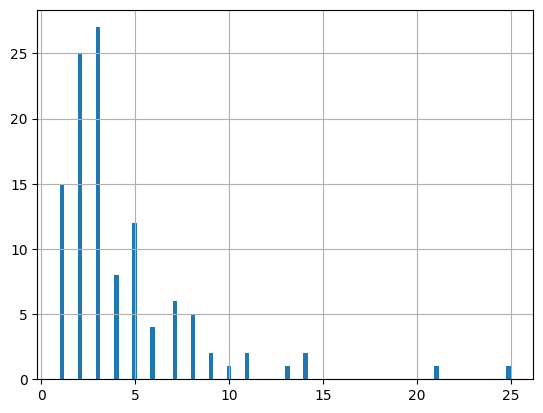

In [17]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 100)

In [18]:
max_seq_len = 25

In [19]:
# tokenize and encode sequences in the training set
# Parameters max_length = The maximum length (in number of tokens) for the inputs to the transformer model

# tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)


/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


# Convert Integer Sequences to Tensors

In [20]:
#3 input of multihead attention including 
#1.key = ids
#2.query = attention_mask
#3.value = label (0,1)
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

# for validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

# Create DataLoaders

In [21]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

# UnFreeze BERT Parameters

ถ้าใช้ Weight จาก Dataseet เราใช้อันนี้ แต่ถ้าใช้ขงเขาไม่ต้องรัน

In [48]:
# unfreeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

# Define Model Architecture
# Solved error: https://stackoverflow.com/questions/66846030/typeerror-linear-argument-input-position-1-must-be-tensor-not-str

In [23]:
class BERT_Arch(nn.Module):
# Applies a linear transformation to the incoming data:
# Parameters in_features – size of each input sample and out_features – size of each output sample

    def __init__(self, bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      # dropout layer
      self.dropout = nn.Dropout(0.1)
      
      # relu activation function
      self.relu =  nn.ReLU()
        # layer normalization
      self.layer_norm1 = nn.LayerNorm(768)
      self.layer_norm2 = nn.LayerNorm(512)


      # dense layer 1
      self.fc1 = nn.Linear(768,512)    
      # dense layer 2

      self.fc2 = nn.Linear(512,256)
      # dense layer 3 (Output layer)
      self.fc3 = nn.Linear(256,2)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      _, cls_hs = self.bert(sent_id, attention_mask=mask,return_dict=False) #In case use TF 3 version delete  return_dict=False
      x = self.layer_norm1(cls_hs)
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)

      #Add layer
      x = self.layer_norm2(x)
      x = self.fc2(x)  # Added new dense layer
      x = self.relu(x)
      x = self.dropout(x)

      # output layer
      x = self.fc3(x)
      
      # apply softmax activation
      x = self.softmax(x)

      return x

In [24]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [25]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01) # Learning rate  1e-3  = 1x10^-3

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


# Find Class Weights

In [26]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights for unbalanced datasets
class_wts = compute_class_weight('balanced', classes= np.unique(train_labels), y= train_labels)

print(class_wts)

[1. 1.]


Epochs

In [27]:
# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 100

# Fine-Tune BERT

In [28]:
# function to train the model
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
 
    sent_id, mask, labels = batch

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [29]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
      elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

# Start Model Training

In [30]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()

    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 100

Evaluating...

Training Loss: 0.610
Validation Loss: 0.428

 Epoch 2 / 100

Evaluating...

Training Loss: 0.423
Validation Loss: 0.265

 Epoch 3 / 100

Evaluating...

Training Loss: 0.290
Validation Loss: 0.161

 Epoch 4 / 100

Evaluating...

Training Loss: 0.189
Validation Loss: 0.102

 Epoch 5 / 100

Evaluating...

Training Loss: 0.140
Validation Loss: 0.069

 Epoch 6 / 100

Evaluating...

Training Loss: 0.080
Validation Loss: 0.057

 Epoch 7 / 100

Evaluating...

Training Loss: 0.050
Validation Loss: 0.059

 Epoch 8 / 100

Evaluating...

Training Loss: 0.044
Validation Loss: 0.058

 Epoch 9 / 100

Evaluating...

Training Loss: 0.041
Validation Loss: 0.056

 Epoch 10 / 100

Evaluating...

Training Loss: 0.026
Validation Loss: 0.050

 Epoch 11 / 100

Evaluating...

Training Loss: 0.020
Validation Loss: 0.044

 Epoch 12 / 100

Evaluating...

Training Loss: 0.014
Validation Loss: 0.041

 Epoch 13 / 100

Evaluating...

Training Loss: 0.015
Validation Loss: 0.035

 Epoch 

# Load Saved Model

In [31]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

# Get Predictions for Train Data

In [32]:
# get predictions for test data
with torch.no_grad():
  preds = model(train_seq.to(device), train_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [33]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(train_y, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        56

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



In [34]:
# confusion matrix
pd.crosstab(train_y, preds)

col_0,0,1
row_0,,
0,56,0
1,0,56


Test

In [35]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [36]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [37]:
# confusion matrix
pd.crosstab(test_y, preds)

col_0,0,1
row_0,,
0,13,0
1,0,6
